# Place field analysis

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiment import Experiment


data_path = "../data"
save_path = "../figs"

### Strongest Place Cells

In [2]:
exp = Experiment.load_experiment(data_path, 'baseline')

exp.compile_grid_cells(1)
exp.load_pfs()

net = exp.agent.actor
net.clamp_weights()

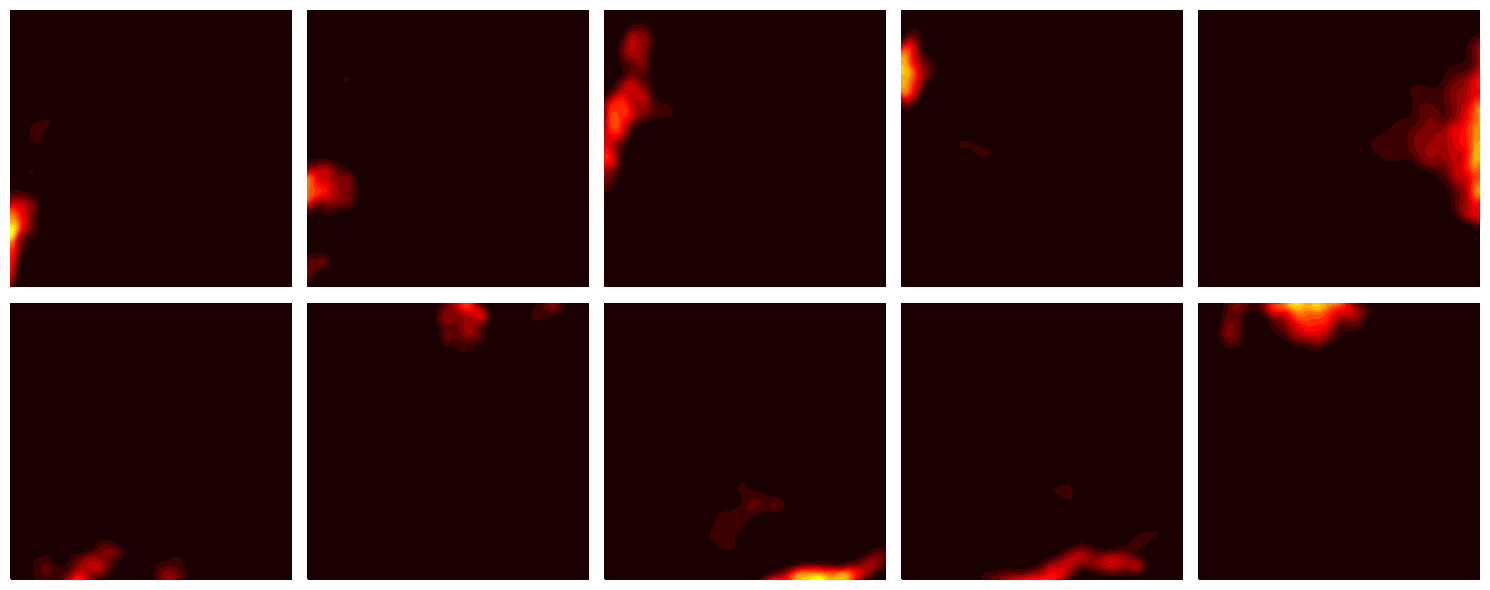

In [3]:
_, axs = plt.subplots(2, 5, figsize=(15, 6))

hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach().cpu().numpy()

# Small hack to ensure the same scale for every plot
hidden[:,0,0] = hidden.max()
hidden[:,0,1] = hidden.min()

idx = net.lin2.weight[2:].detach().cpu().abs().argsort(dim=-1)[:,-5:]
for img, ax in zip(hidden[idx.flatten()], axs.flatten()):
    ax.contourf(img, levels=20, cmap='hot')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Example Place Fields

In [36]:
hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1))
preds = exp.pfs.predict()
# preds[:,0,0] = hidden.max().item()
# hidden[:,0,0] = hidden.max()

In [109]:
i = 55
set(exp.pfs.scales.flatten().argsort()[-i:].cpu().numpy()).intersection(set(explained.argsort()[:i].cpu().numpy()))

{0, 56, 71, 91, 96}

In [110]:
active = hidden[0]

In [37]:
explained = exp.pfs.calc_fitness()
idx = explained[explained > 0.5].sort().indices

In [60]:
i = 0
pred_worst = preds[explained > 0.5][idx[i]]
real_worst = hidden[explained > 0.5][idx[i]]

In [61]:
i = -1
pred_best = preds[explained > 0.5][idx[i]]
real_best = hidden[explained > 0.5][idx[i]]

In [ ]:
exp.compile_grid_cells(2)
exp.load_pfs()

In [140]:
hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1))
preds = exp.pfs.predict()
# preds[:,0,0] = hidden.max().item()
# hidden[:,0,0] = hidden.max()

In [141]:
active_remap = hidden[0]

In [154]:
exp.pfs.calc_fitness()[0]

tensor(0.8000, device='cuda:0', grad_fn=<SelectBackward0>)

In [124]:
i = 0
pred_worst_remap = preds[explained > 0.5][idx[i]]
real_worst_remap = hidden[explained > 0.5][idx[i]]

In [125]:
i = -1
pred_best_remap = preds[explained > 0.5][idx[i]]
real_best_remap = hidden[explained > 0.5][idx[i]]

In [136]:
exp.pfs.calc_fitness()[explained > 0.5][[idx[0].item(), idx[-1].item()]]

tensor([0.6112, 0.7962], device='cuda:0', grad_fn=<IndexBackward0>)

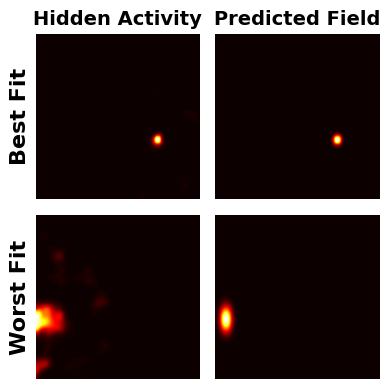

In [193]:
_, axs = plt.subplots(2, 2, figsize=(4, 4))

axs[0, 0].contourf(real_best.detach().cpu(), levels=100, cmap='hot')
axs[0, 1].contourf(pred_best.detach().cpu(), levels=100, cmap='hot')
axs[1, 0].contourf(real_worst.detach().cpu(), levels=100, cmap='hot')
axs[1, 1].contourf(pred_worst.detach().cpu(), levels=100, cmap='hot')

axs[0, 0].set_title('Hidden Activity', fontweight='bold', fontsize=14)
axs[0, 1].set_title('Predicted Field', fontweight='bold', fontsize=14)
axs[0, 0].set_ylabel('Best Fit', fontweight='bold', fontsize=16)
axs[1, 0].set_ylabel('Worst Fit', fontweight='bold', fontsize=16)

for ax in axs.flatten():
    ax.axis('equal')
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.savefig("../figs/pfs.png")
plt.show()

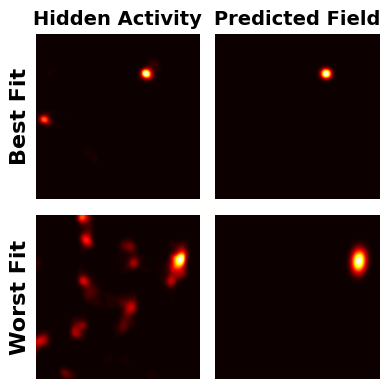

In [194]:
_, axs = plt.subplots(2, 2, figsize=(4, 4))

axs[0, 0].contourf(real_best_remap.detach().cpu(), levels=100, cmap='hot')
axs[0, 1].contourf(pred_best_remap.detach().cpu(), levels=100, cmap='hot')
axs[1, 0].contourf(real_worst_remap.detach().cpu(), levels=100, cmap='hot')
axs[1, 1].contourf(pred_worst_remap.detach().cpu(), levels=100, cmap='hot')

axs[0, 0].set_title('Hidden Activity', fontweight='bold', fontsize=14)
axs[0, 1].set_title('Predicted Field', fontweight='bold', fontsize=14)
axs[0, 0].set_ylabel('Best Fit', fontweight='bold', fontsize=16)
axs[1, 0].set_ylabel('Worst Fit', fontweight='bold', fontsize=16)

for ax in axs.flatten():
    ax.axis('equal')
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.savefig("../figs/pfs_remap.png")
plt.show()

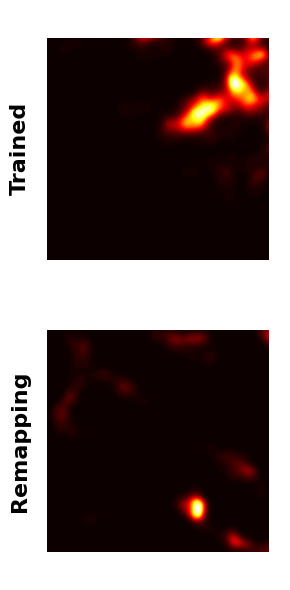

In [196]:
_, axs = plt.subplots(2, 1, figsize=(3, 6))

axs[0].contourf(active.detach().cpu(), levels=100, cmap='hot')
axs[1].contourf(active_remap.detach().cpu(), levels=100, cmap='hot')
axs[0].set_ylabel('Trained', fontweight='bold', fontsize=16)
axs[1].set_ylabel('Remapping', fontweight='bold', fontsize=16)

for ax in axs.flatten():
    ax.axis('equal')
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.savefig("../figs/active.png")
plt.show()

### Homogeneous Peaks

In [2]:
exp = Experiment.load_experiment(data_path, 'homo')

In [40]:
exp.compile_grid_cells(1)
exp.load_pfs()

net = exp.agent.actor
net.clamp_weights()

In [3]:
hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach()
preds = exp.pfs.predict()

In [9]:
exp.pfs.get_place_cells()

tensor([  4,   7,   9,  16,  18,  22,  29,  30,  38,  39,  40,  48,  53,  55,
         64,  66,  68,  69,  72,  76,  81,  82,  85,  94,  95,  96,  98, 101,
        103, 104, 106, 107, 115, 116, 118, 120, 122, 127], device='cuda:0')

In [5]:
fit = exp.pfs.calc_fitness()

0.2966352105140686
0.3384690284729004


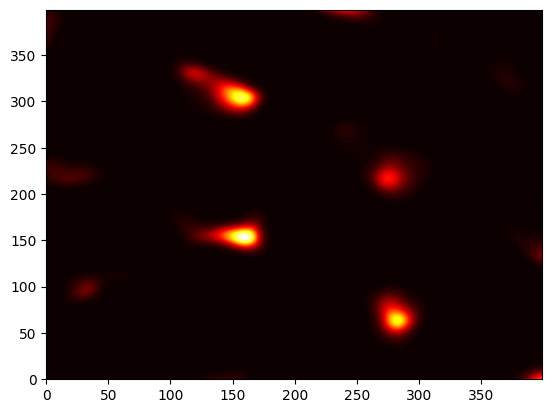

In [41]:
i = 50
print(hidden[i].max().item())
print(fit[i].max().item())
plt.contourf(hidden[i].detach().cpu(), levels=100, cmap='hot')

In [9]:
real = hidden[i]
pred = preds[i]

In [ ]:
exp.compile_grid_cells(2)
exp.load_pfs()

In [44]:
hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach()
preds = exp.pfs.predict()

In [15]:
exp.pfs.get_place_cells()

tensor([  1,   2,   3,   5,   8,   9,  14,  18,  21,  23,  28,  29,  33,  38,
         40,  46,  52,  53,  55,  58,  65,  66,  68,  74,  76,  81,  82,  87,
         96,  98, 106, 109, 117, 118, 120, 121, 122, 127], device='cuda:0')

In [42]:
fit = exp.pfs.calc_fitness()

0.4155995547771454
0.042627930641174316


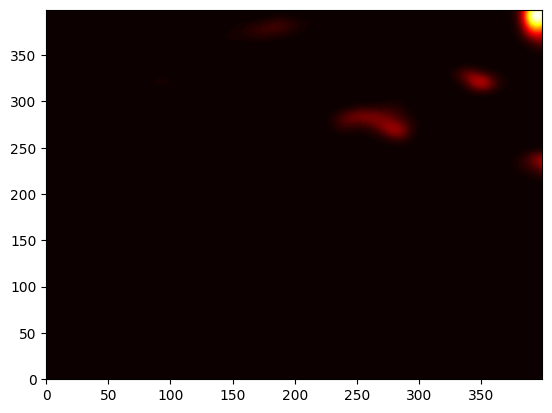

In [48]:
i = 50
print(hidden[i].max().item())
print(fit[i].max().item())
plt.contourf(hidden[i].detach().cpu(), levels=100, cmap='hot')

In [35]:
real_remap = hidden[i]
pred_remap = preds[i]

In [39]:
real_remap_bad = hidden[i]

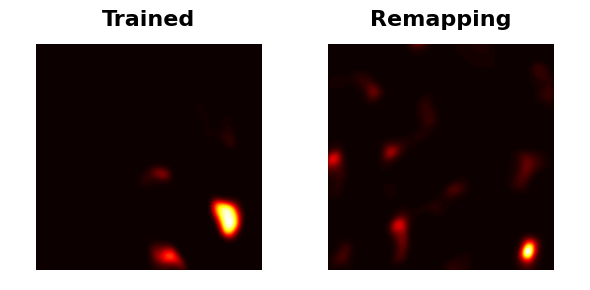

In [51]:
_, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].contourf(real.detach().cpu(), levels=100, cmap='hot')
axs[1].contourf(real_remap.detach().cpu(), levels=100, cmap='hot')
axs[0].set_title('Trained', fontweight='bold', fontsize=16)
axs[1].set_title('Remapping', fontweight='bold', fontsize=16)

for ax in axs.flatten():
    ax.axis('equal')
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.savefig("../figs/variability.png")
plt.show()

In [54]:
{env: np.mean(l[-5000:]) for env, l in exp.pfs_losses.items()}

{'1': 2385.8578092447915, '2': 4680.898154622396}

In [55]:
{env: np.mean(l[-5000:]) for env, l in Experiment.load_experiment(data_path, 'baseline').pfs_losses.items()}

{'1': 1943.1016669108074, '2': 20649.08276888021}

### Number of Modules

In [56]:
exp = Experiment.load_experiment(data_path, '2modules484cells')

In [57]:
exp.compile_grid_cells(1)
exp.load_pfs()

net = exp.agent.actor
net.clamp_weights()

In [91]:
hidden_env1 = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach()
preds_env1 = exp.pfs.predict()

ac1 = set(exp.pfs.get_active_cells().cpu().numpy())
pc1 = set(exp.pfs.get_place_cells().cpu().numpy())

fit1 = exp.pfs.calc_fitness()

In [94]:
exp.compile_grid_cells(2)
exp.load_pfs()

In [95]:
hidden_env2 = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach()
preds_env2 = exp.pfs.predict()

ac2 = set(exp.pfs.get_active_cells().cpu().numpy())
pc2 = set(exp.pfs.get_place_cells().cpu().numpy())

fit2 = exp.pfs.calc_fitness()

In [132]:
' '.join([str(c) for c in pc1 - pc2])

'10 19 24 25 30 39 40 44 49 53 59 65 69 72 84 87 95 105 110 111 118 125'

0.34377798438072205
0.6291148662567139


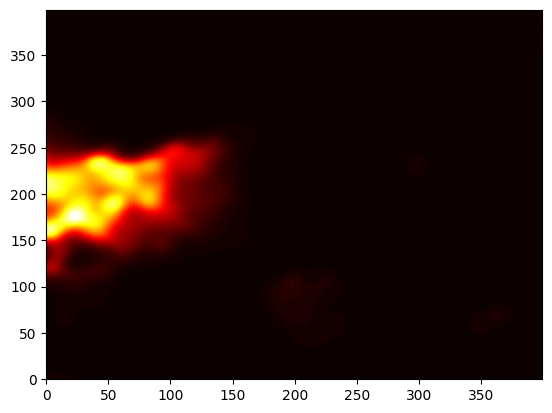

In [140]:
i = 25
print(hidden_env1[i].max().item())
print(fit1[i].max().item())
plt.contourf(hidden_env1[i].detach().cpu(), levels=100, cmap='hot')

0.20797759294509888
0.31737565994262695


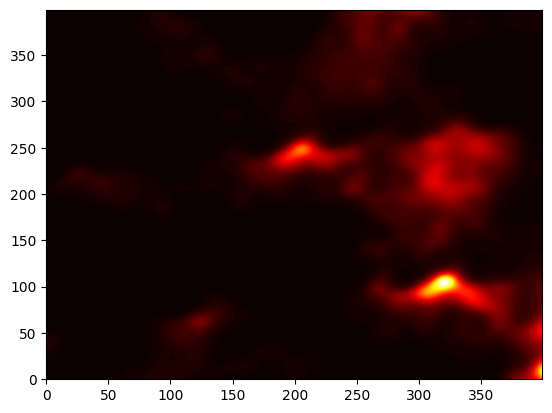

In [141]:
# i = 1
print(hidden_env2[i].max().item())
print(fit2[i].max().item())
plt.contourf(hidden_env2[i].detach().cpu(), levels=100, cmap='hot')

### Number of Grid Cells

### All Hidden Units

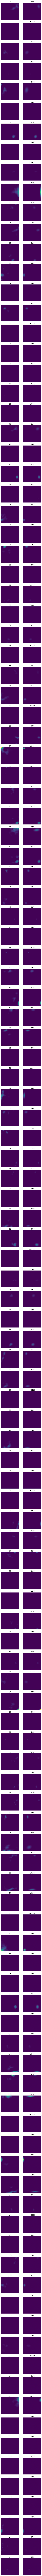

In [4]:
N = exp.pfs.means.shape[0]
preds = exp.pfs.predict().cpu().detach().numpy()
preds[:,0,0] = hidden.max()
hidden[:,0,0] = hidden.max()
explained = exp.pfs.calc_fitness()

for i, ((ax1, ax2), pred, real, expl) in enumerate(zip(plt.subplots(N, 2, figsize=(6, 3*N))[1],
                                                       preds, hidden[:N], explained.cpu().detach())):
    ax1.contourf(real, levels=100)
    ax1.axis('off')
    ax1.set_title(i)
    ax2.contourf(pred, levels=100)
    ax2.axis('off')
    ax2.set_title(f"{expl.item():.04f}")
plt.show()

In [13]:
exp.compile_grid_cells(2)
exp.load_pfs()

In [6]:
hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach().cpu().numpy()
hidden[:,0,0] = hidden.max()
hidden[:,0,1] = hidden.min()

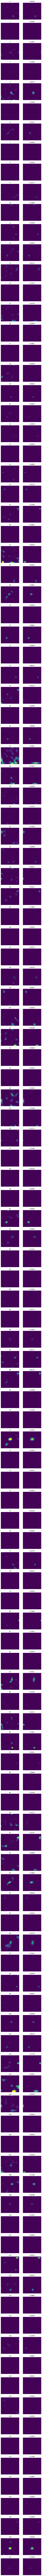

In [7]:
N = exp.pfs.means.shape[0]
preds = exp.pfs.predict().cpu().detach().numpy()
preds[:,0,0] = hidden.max()
hidden[:,0,0] = hidden.max()
explained = exp.pfs.calc_fitness()

for i, ((ax1, ax2), pred, real, expl) in enumerate(zip(plt.subplots(N, 2, figsize=(6, 3*N))[1],
                                                       preds, hidden[:N], explained.cpu().detach())):
    ax1.contourf(real, levels=100)
    ax1.axis('off')
    ax1.set_title(i)
    ax2.contourf(pred, levels=100)
    ax2.axis('off')
    ax2.set_title(f"{expl.item():.04f}")
plt.show()